In [1]:
# numpy and pandas for data manipulation
import sys
import os
# Suppress warnings
import warnings

import matplotlib.pyplot as plt
import networkx as nx

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import cPickle as pickle

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

ROOT = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/'
ROOT_PACKAGE_DIRECTORY = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/collaborative-optimizer'
root_data = ROOT + '/data'

sys.path.append(ROOT_PACKAGE_DIRECTORY)
from experiment_graph.execution_environment import ExecutionEnvironment
from experiment_graph.executor import CollaborativeExecutor
from experiment_graph.workload import Workload


DATABASE_PATH = root_data + '/experiment_graphs/home-credit-default-risk/materialized-no-groupby'
N_ESTIMATOR = 100
from experiment_graph.optimizations.Reuse import LinearTimeReuse
reuse_type=LinearTimeReuse.NAME

In [2]:
# Prepare the Data
# Create Execution Environment with AllMaterializer
ee = ExecutionEnvironment(reuse_type=reuse_type) 
executor = CollaborativeExecutor(ee)

In [3]:
class BaseWorkload(Workload):
    def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')

        train_labels = train['class']
        train = train.drop(columns=['class'])

        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        #train.data()
        test = scaler.transform(test)

        # Random Forest 1 (n_estimator = 10)
        from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
        random_forest10 = RandomForestClassifier(n_estimators=10, random_state=50, verbose=1, n_jobs=-1)
        random_forest10.fit(train, train_labels)

        # Execute
        #random_forest10.trained_node.data()

        random_forest10.score(test, test_labels).data(verbose=verbose)
        return True
base_workload = BaseWorkload()
executor.end_to_end_run(workload=base_workload, root_data=root_data, verbose=1)

creating a new root node
creating a new root node
computing: DBDC4A474E8B084B17D4A95D82CBA082
computing: 991F3690053BFE13CEDF335CFB510266
computing: 30BA78B1E3083C85ED55C85637140914
computing: C2B2A08B3D0EFA08C2A06B7187FF500B
computing: 2CCB1EC7A9FF11E906F0C2558E6A6CFF


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


computing: 1F22A9E7687B4B9E5ED728910FC93F1A
computing: C42F2CDE6885202579E291D6BC09DAA6
computing: B0B5D94F1B43F18EF00C461EC8EEDFAF
computing: AD4CB332A23AF19C1150A43876F369FD
executing 18 steps to compute vertex AD4CB332A23AF19C1150A43876F369FD
test.csv{} True <experiment_graph.graph.auxilary.DataFrame object at 0x109c40f50>
1F22A9E7687B4B9E5ED728910FC93F1A True <experiment_graph.graph.auxilary.DataSeries object at 0x1104a6e50>
C42F2CDE6885202579E291D6BC09DAA6 True <experiment_graph.graph.auxilary.DataFrame object at 0x1104a6f10>
train.csv{} True <experiment_graph.graph.auxilary.DataFrame object at 0x10a0921d0>
DBDC4A474E8B084B17D4A95D82CBA082 True <experiment_graph.graph.auxilary.DataSeries object at 0x110436a90>
991F3690053BFE13CEDF335CFB510266 True <experiment_graph.graph.auxilary.DataFrame object at 0x110436ad0>
30BA78B1E3083C85ED55C85637140914 True MinMaxScaler(copy=True, feature_range=(0, 1))
B0B5D94F1B43F18EF00C461EC8EEDFAF True <experiment_graph.graph.auxilary.DataFrame object

True

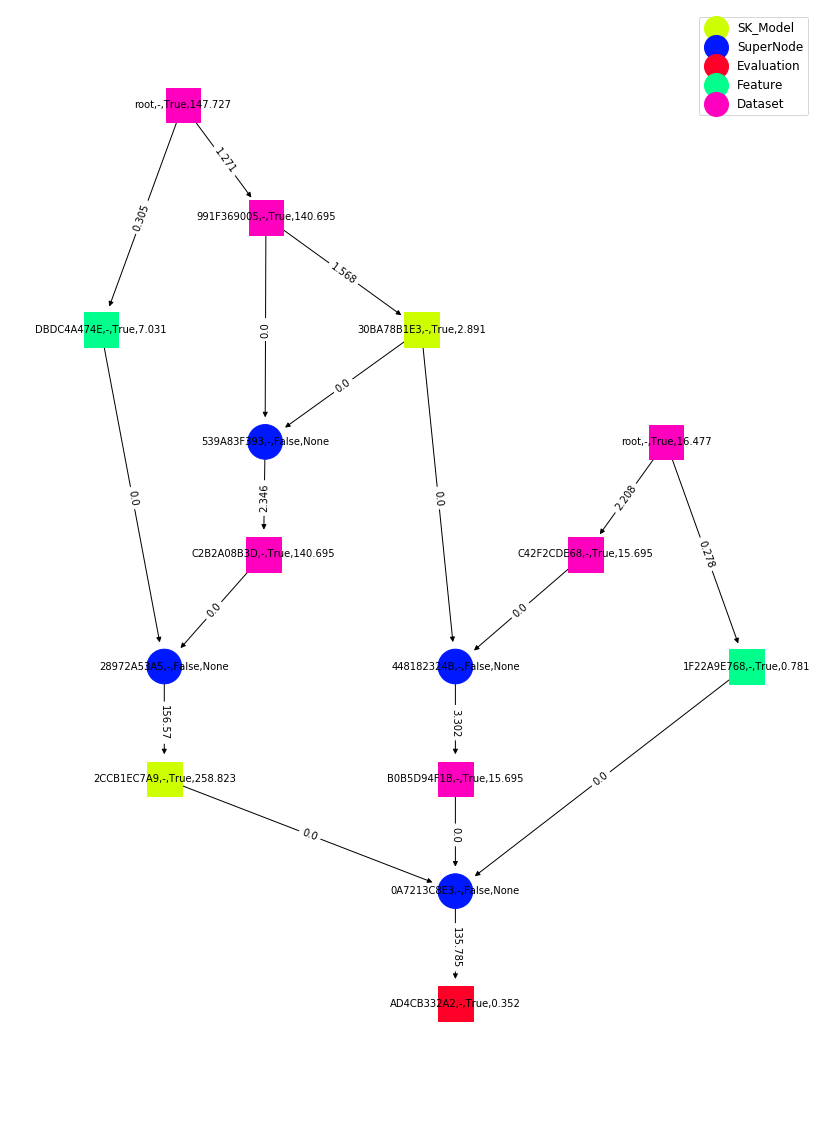

In [4]:
executor.execution_environment.experiment_graph.plot_graph(
    plt,
    figsize=(14, 20),
    labels_for_vertex=['id','mat','size'],
    labels_for_edges=['execution_time'],
    vertex_size=1200)

In [5]:
class ReuseMinMaxWorkload(Workload):
     def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')

        train_labels = train['class']
        train = train.drop(columns=['class'])

        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)
        train.data(verbose = verbose)
        return True
min_max_reuse = ReuseMinMaxWorkload()
executor.end_to_end_run(workload=min_max_reuse, root_data=root_data, verbose = 1)

loading root node train.csv{} from history graph
loading root node test.csv{} from history graph
LINEAR TIME REUSE, C2B2A08B3D0EFA08C2A06B7187FF500B
After forward pass mat_set=set(['30BA78B1E3083C85ED55C85637140914', '991F3690053BFE13CEDF335CFB510266', 'C2B2A08B3D0EFA08C2A06B7187FF500B']), warm_set=set([])
After backward pass mat_set=set(['30BA78B1E3083C85ED55C85637140914', '991F3690053BFE13CEDF335CFB510266', 'C2B2A08B3D0EFA08C2A06B7187FF500B']), warm_set=set([])
materialized_vertices: set(['C2B2A08B3D0EFA08C2A06B7187FF500B'])
warmstarting_candidates: set([])
C2B2A08B3D0EFA08C2A06B7187FF500B was copied directly from experiment graph
test.csv{} True <experiment_graph.graph.auxilary.DataFrame object at 0x1104a63d0>
1F22A9E7687B4B9E5ED728910FC93F1A False None
C42F2CDE6885202579E291D6BC09DAA6 False None
LINEAR TIME REUSE, C42F2CDE6885202579E291D6BC09DAA6
train.csv{} True <experiment_graph.graph.auxilary.DataFrame object at 0x109c40d10>
DBDC4A474E8B084B17D4A95D82CBA082 False None
991F369005

True

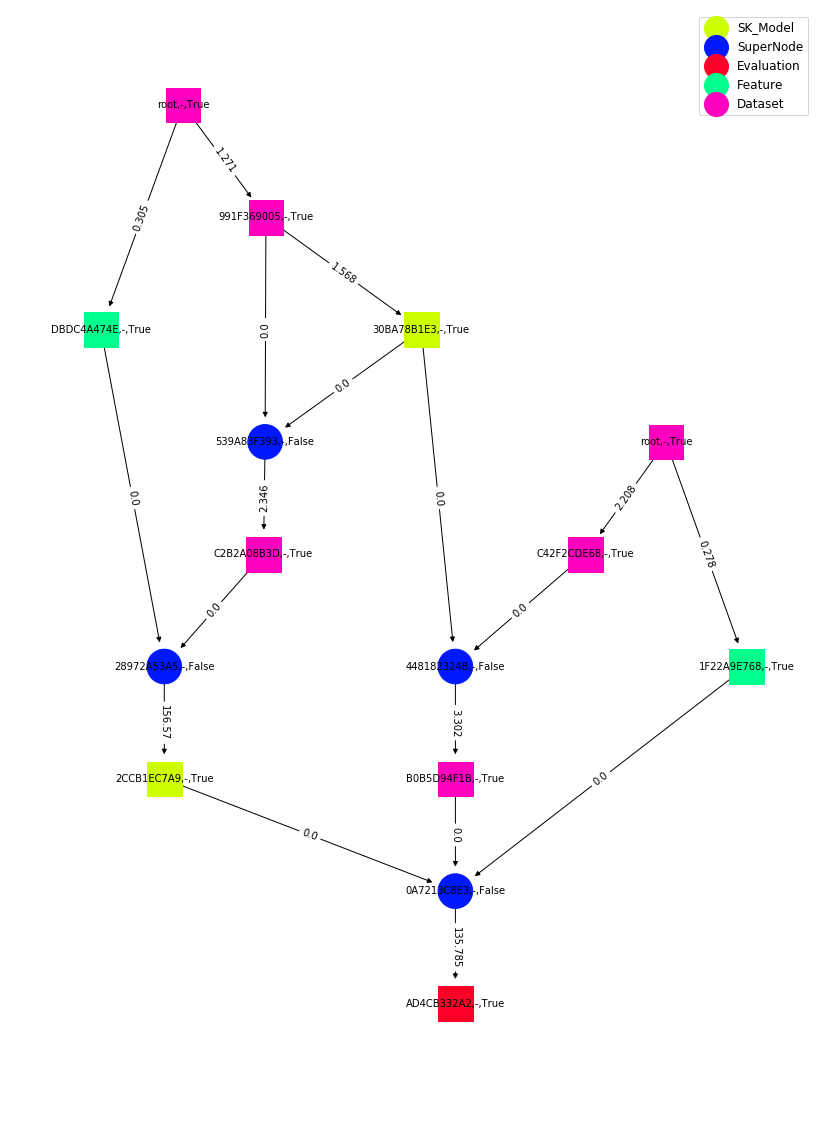

In [6]:
executor.execution_environment.experiment_graph.plot_graph(
    plt,
    figsize=(14, 20),
    labels_for_vertex=['id','mat'],
    labels_for_edges=['execution_time'],
    vertex_size=1200)

In [7]:
class ReuseFullWorkload(Workload):
    def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')
        #test_labels.data()
        train_labels = train['class']
        train = train.drop(columns=['class'])
        
        #train_labels.data()
        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)

        # Random Forest 1 (n_estimator = 10)
        from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
        random_forest10 = RandomForestClassifier(n_estimators=10, random_state=50, verbose=1, n_jobs=-1)
        random_forest10.fit(train, train_labels)

        # Execute
        #random_forest10.trained_node.data()
        
        random_forest10.score(test, test_labels).data(verbose=verbose)
        return True

full_workload = ReuseFullWorkload()
executor.end_to_end_run(workload=full_workload, root_data=root_data, verbose = 1)

loading root node train.csv{} from history graph
loading root node test.csv{} from history graph
LINEAR TIME REUSE, AD4CB332A23AF19C1150A43876F369FD
After forward pass mat_set=set(['AD4CB332A23AF19C1150A43876F369FD', '2CCB1EC7A9FF11E906F0C2558E6A6CFF', 'DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set([])
After backward pass mat_set=set(['AD4CB332A23AF19C1150A43876F369FD', '2CCB1EC7A9FF11E906F0C2558E6A6CFF', 'DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set([])
materialized_vertices: set(['AD4CB332A23AF19C1150A43876F369FD'])
warmstarting_candidates: set([])
AD

True

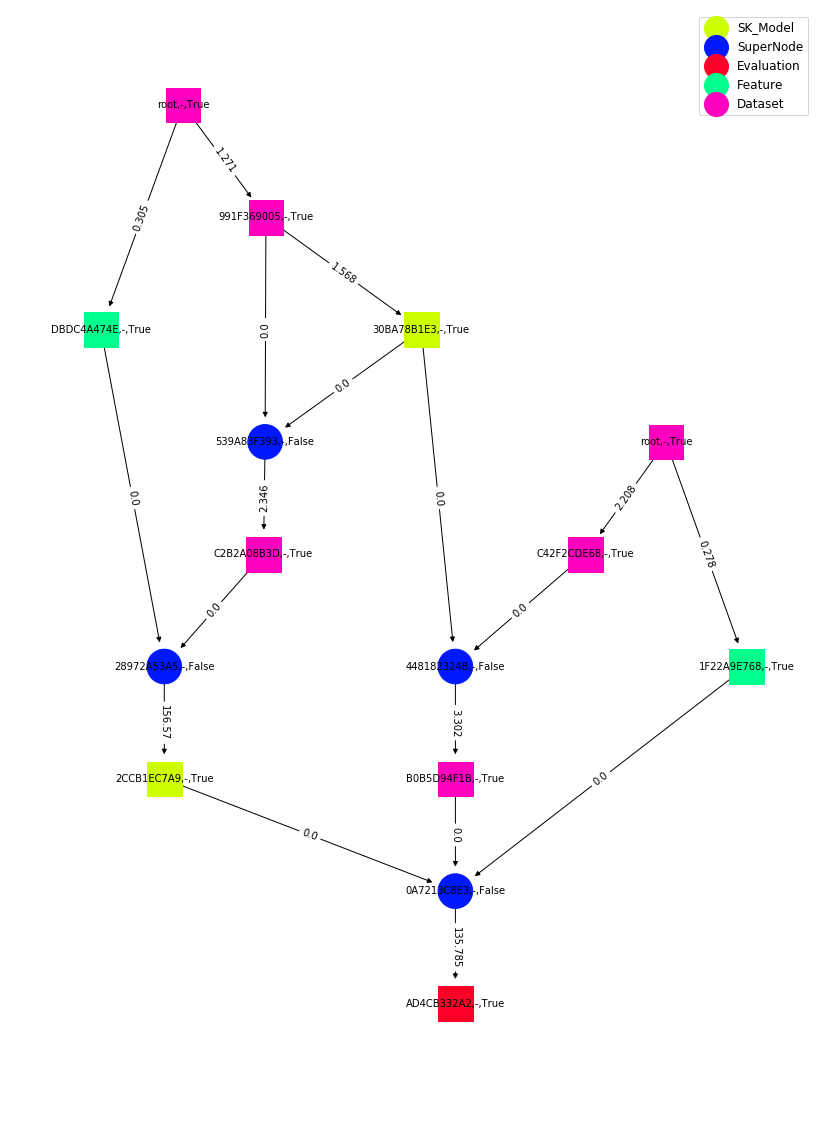

In [8]:
executor.execution_environment.experiment_graph.plot_graph(
    plt,
    figsize=(14, 20),
    labels_for_vertex=['id','mat'],
    labels_for_edges=['execution_time'],
    vertex_size=1200)

In [9]:
graph = executor.execution_environment.experiment_graph.graph

In [10]:
print graph.nodes['C42F2CDE6885202579E291D6BC09DAA6']['data'].underlying_data.get_column()

['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']


In [11]:
graph.nodes(data='type')


NodeDataView({'AD4CB332A23AF19C1150A43876F369FD': 'Evaluation', '2CCB1EC7A9FF11E906F0C2558E6A6CFF': 'SK_Model', 'DBDC4A474E8B084B17D4A95D82CBA082': 'Feature', 'C2B2A08B3D0EFA08C2A06B7187FF500B': 'Dataset', '539A83F3935BADF7F9842FFABAFE2430': 'SuperNode', '30BA78B1E3083C85ED55C85637140914': 'SK_Model', '1F22A9E7687B4B9E5ED728910FC93F1A': 'Feature', '448182324B46BA67CB20BAD4D5BAB73C': 'SuperNode', '28972A53A5F921894C4B56DA69ECE52F': 'SuperNode', 'C42F2CDE6885202579E291D6BC09DAA6': 'Dataset', 'train.csv{}': 'Dataset', 'B0B5D94F1B43F18EF00C461EC8EEDFAF': 'Dataset', 'test.csv{}': 'Dataset', '991F3690053BFE13CEDF335CFB510266': 'Dataset', '0A7213C8E32C2A311DAF741D6EE50F05': 'SuperNode'}, data='type')